In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import importlib
import warnings

import matplotlib.pyplot as plt

# So we can import from src/ when the notebook is inside notebooks/
ROOT_DIR = os.path.abspath("..")
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from scripts.finance_analysis import (
    load_all_tickers,
    add_indicators_to_all,
    plot_price_with_sma,
    plot_rsi,
)

# pynance may not expose portfolio_optimizer at package level in all versions.
# Try multiple import styles and fall back gracefully if unavailable.
try:
    from pynance import portfolio_optimizer as po
except Exception:
    try:
        po = importlib.import_module("pynance.portfolio_optimizer")
    except Exception:
        po = None
        warnings.warn(
            "pynance.portfolio_optimizer is not available in this environment. "
            "Set 'po' to None and continue. Install/upgrade pynance if you need this functionality."
        )

plt.style.use("ggplot")

TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
DATA_DIR = os.path.join(ROOT_DIR, "data")
TICKERS


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_33136\1635946893.py:32: UserWarning: pynance.portfolio_optimizer is not available in this environment. Set 'po' to None and continue. Install/upgrade pynance if you need this functionality.
  warnings.warn(


['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

In [2]:
all_data_raw = load_all_tickers(TICKERS, data_dir=DATA_DIR)

print("Loaded tickers:", list(all_data_raw.keys()))
for t, df in all_data_raw.items():
    print(f"{t}: {df.shape[0]} rows, columns: {df.columns.tolist()}")


Loaded tickers: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
AAPL: 3774 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
AMZN: 3774 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
GOOG: 3774 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
META: 2923 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
MSFT: 3774 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
NVDA: 3774 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']
TSLA: 3400 rows, columns: ['Open', 'High', 'Low', 'Close', 'Volume']


In [3]:
all_data = add_indicators_to_all(all_data_raw)

# Quick peek at one ticker
sample_ticker = "AAPL"
all_data[sample_ticker].tail().head()


,Open,High,Low,Close,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,
2023-12-22,193.353962,193.581821,191.164647,191.788757,37149600,191.856618,183.572859,54.672784,2.633141,3.235256,-0.602115
2023-12-26,191.798670,192.076049,191.025969,191.243912,28919300,192.018094,183.858864,53.090049,2.304751,3.049155,-0.744404
2023-12-27,190.689158,191.689703,189.302247,191.342972,48087700,192.154308,184.149424,53.354446,2.029104,2.845145,-0.816041
2023-12-28,192.323710,192.838849,191.362784,191.768951,34049900,192.362839,184.479567,54.540999,1.823998,2.640915,-0.816918
2023-12-29,192.085953,192.581275,189.936256,190.728775,42672100,192.490633,184.814828,51.121347,1.559539,2.424640,-0.865101


In [4]:
import os

OUTPUT_DIR = os.path.join(ROOT_DIR, "data", "indicators")
os.makedirs(OUTPUT_DIR, exist_ok=True)

for ticker, df in all_data.items():
    out_path = os.path.join(OUTPUT_DIR, f"{ticker}_indicators.csv")
    df.to_csv(out_path)
    print(f"Saved: {out_path}")


Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\AAPL_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\AMZN_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\GOOG_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\META_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\MSFT_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\indicators\NVDA_indicators.csv
Saved: c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\data\in

=== AAPL Price + SMA ===


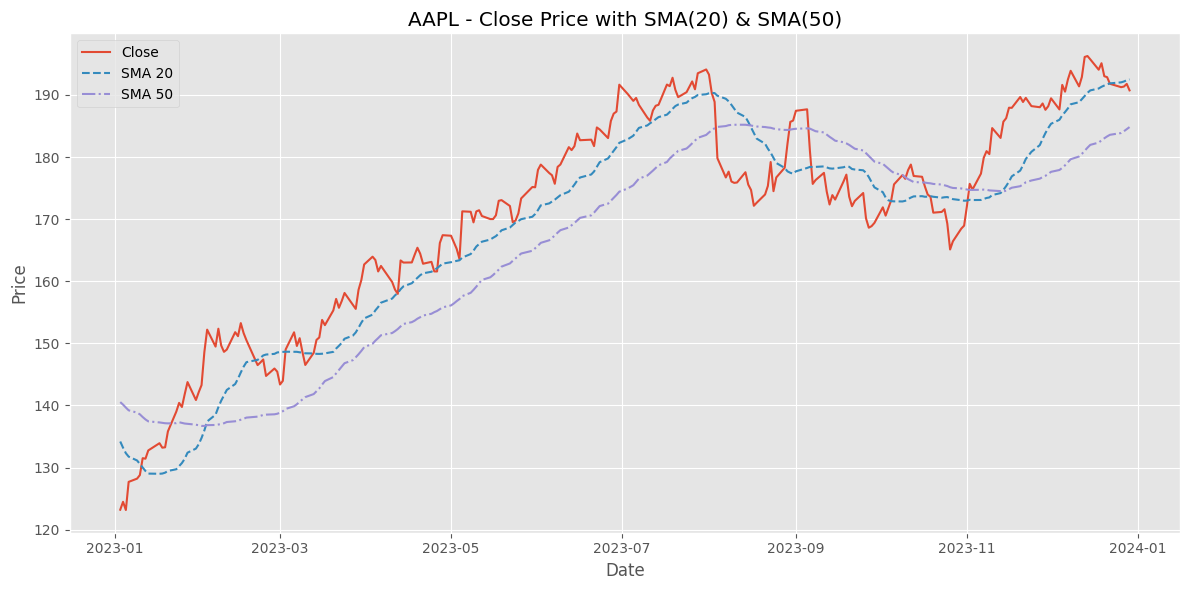

=== AMZN Price + SMA ===


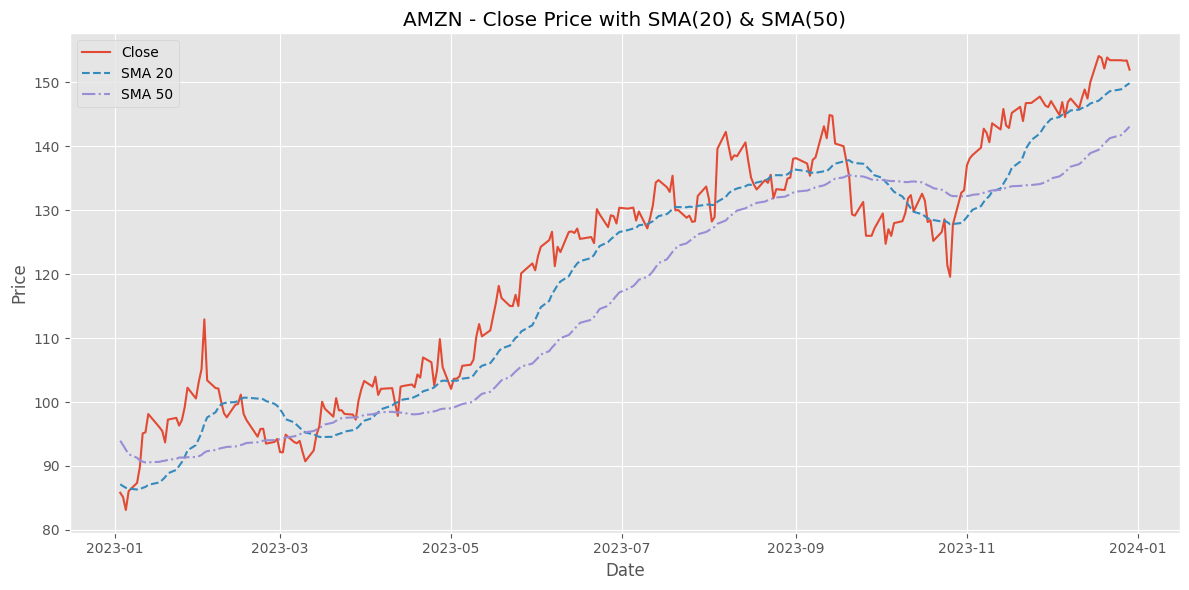

=== GOOG Price + SMA ===


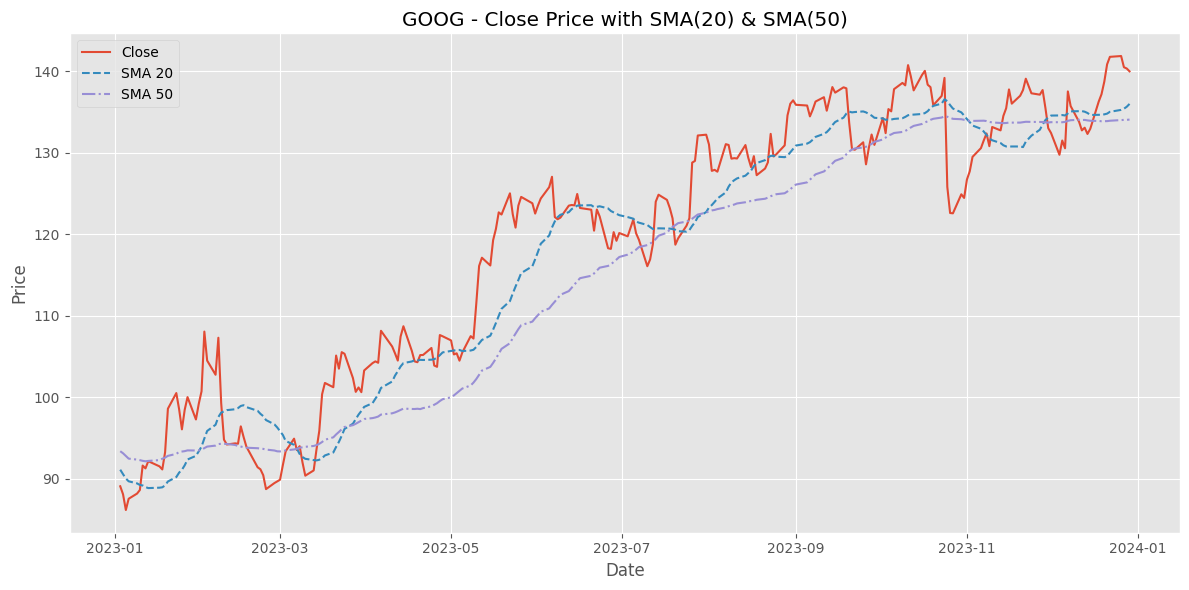

=== META Price + SMA ===


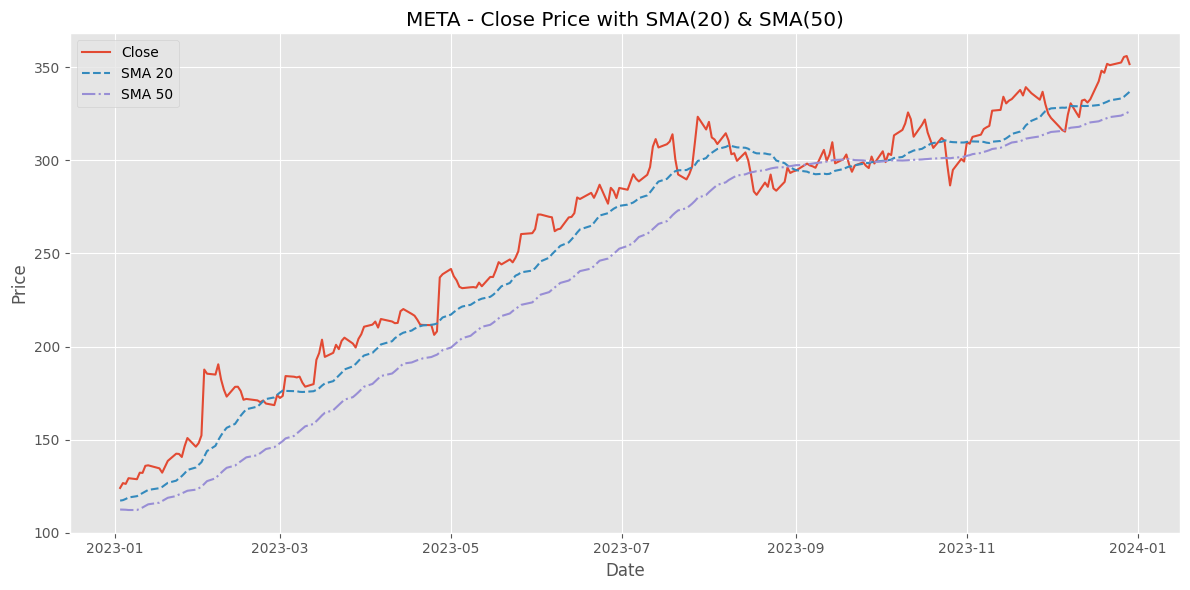

=== MSFT Price + SMA ===


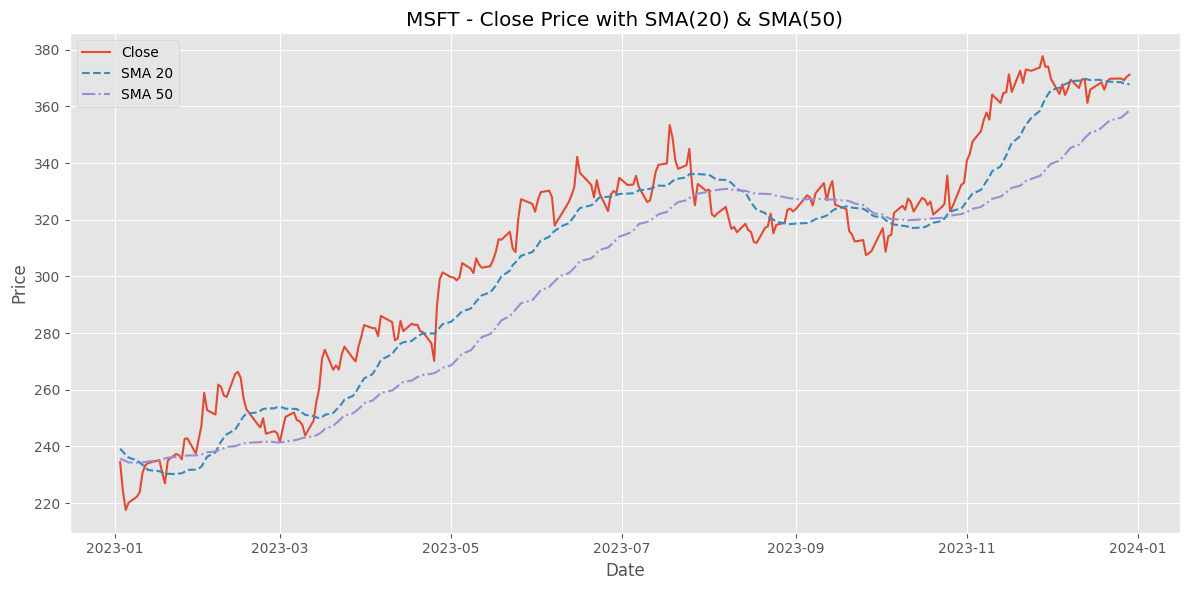

=== NVDA Price + SMA ===


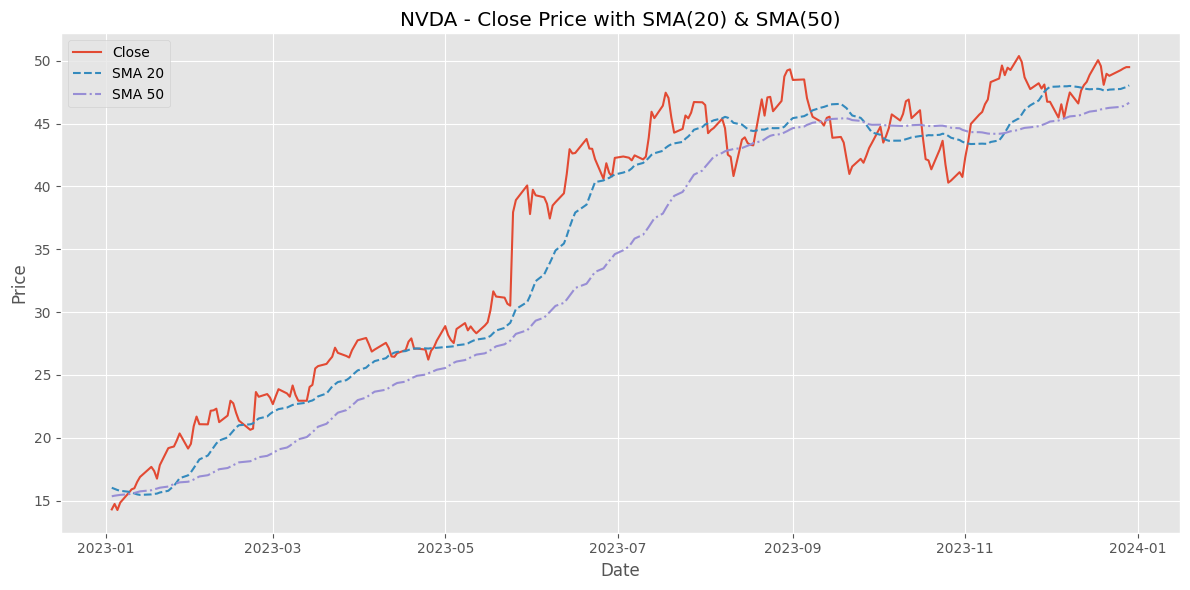

=== TSLA Price + SMA ===


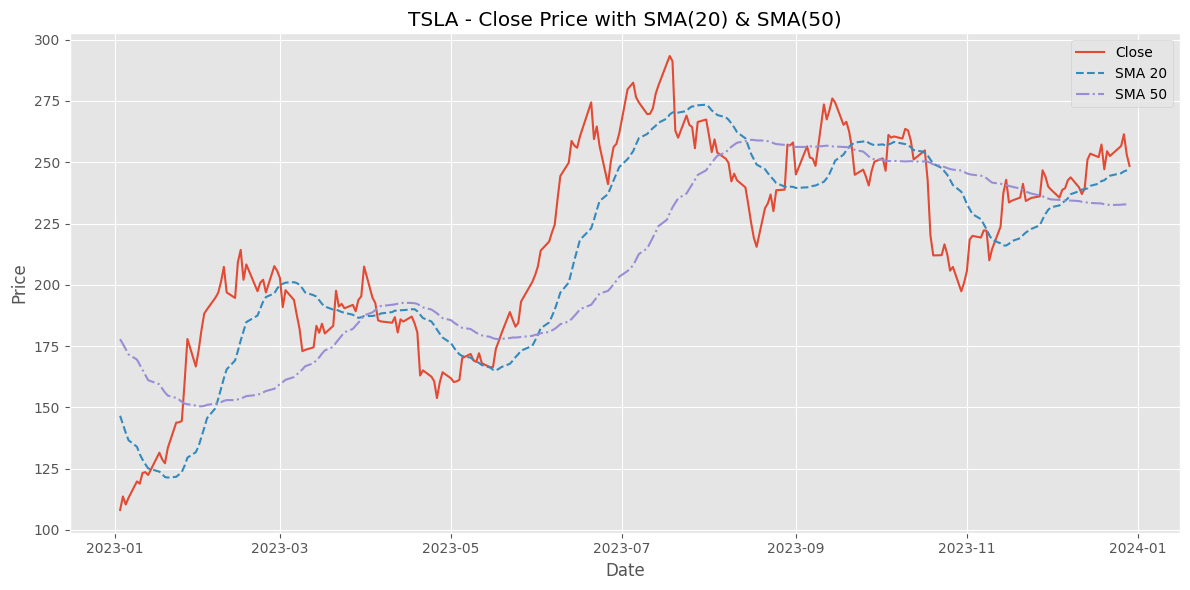

In [5]:
for t, df in all_data.items():
    print(f"=== {t} Price + SMA ===")
    plot_price_with_sma(df, t, last_n=250)


=== AAPL RSI(14) ===


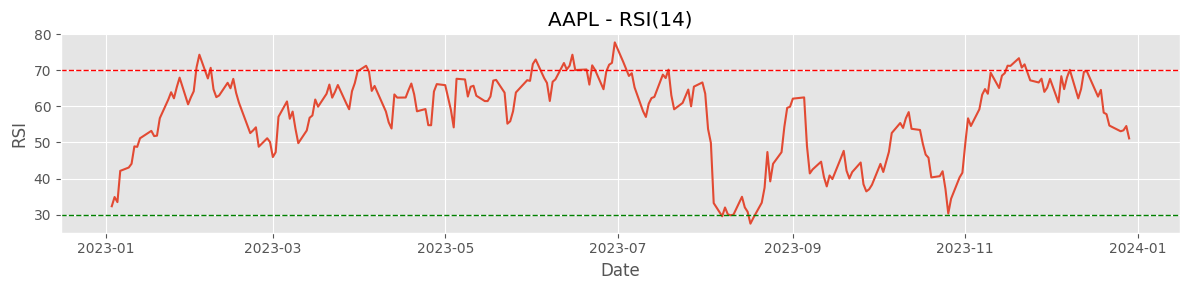

=== AMZN RSI(14) ===


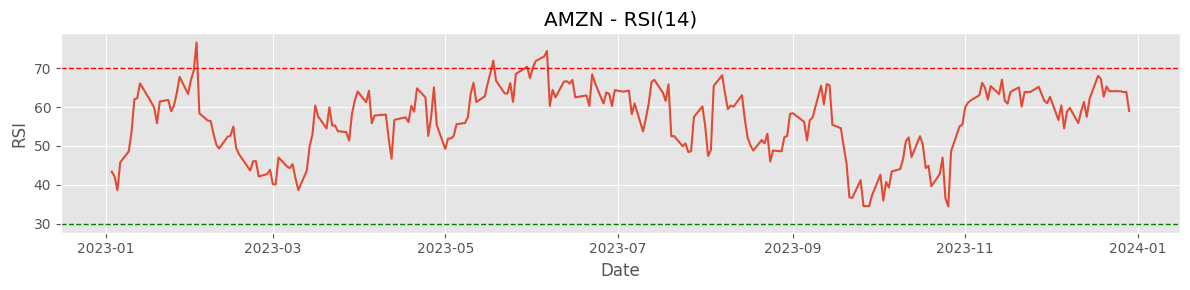

=== GOOG RSI(14) ===


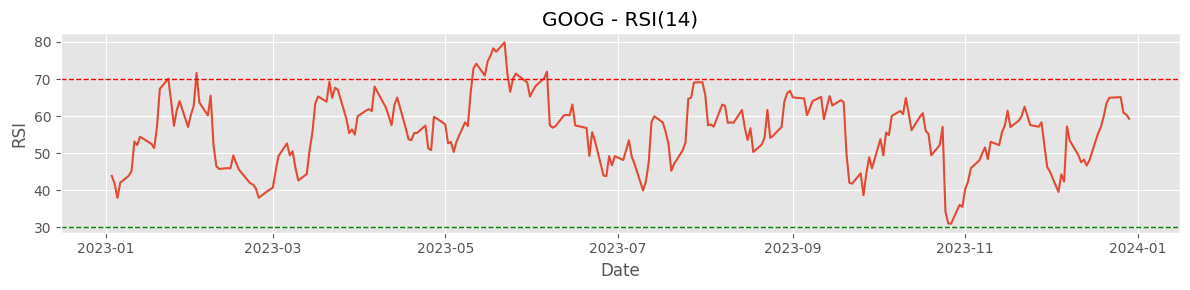

=== META RSI(14) ===


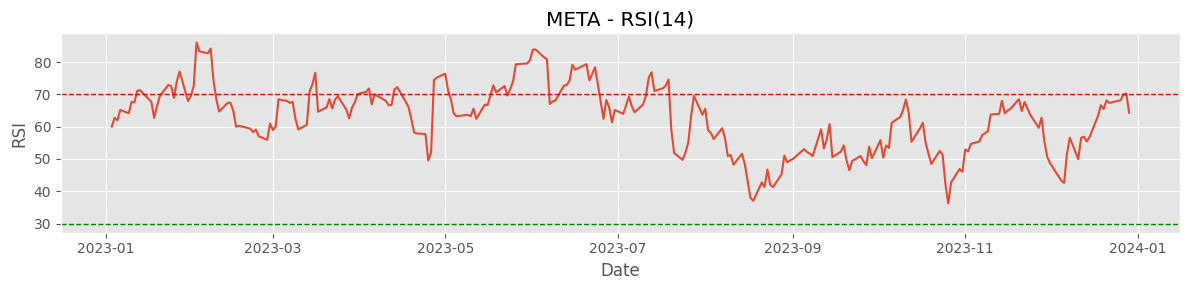

=== MSFT RSI(14) ===


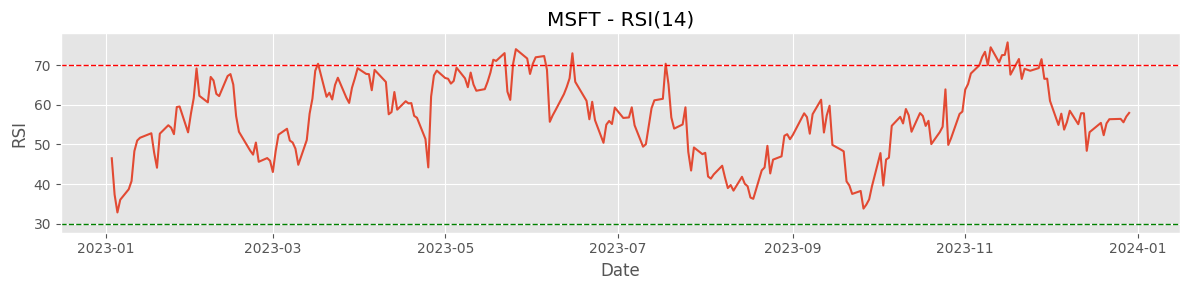

=== NVDA RSI(14) ===


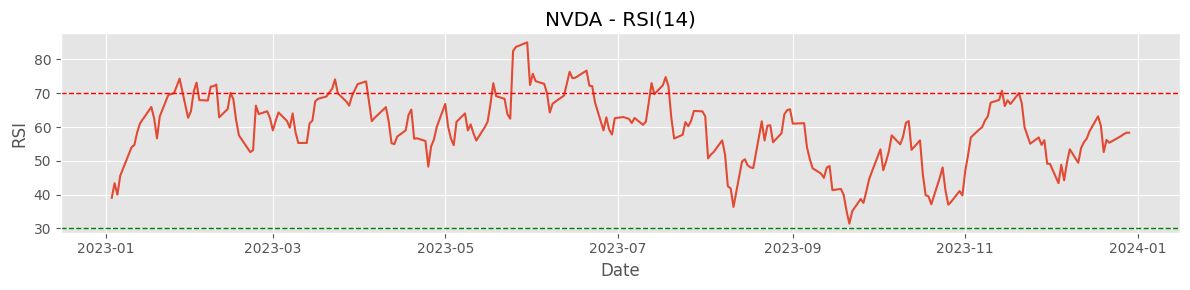

=== TSLA RSI(14) ===


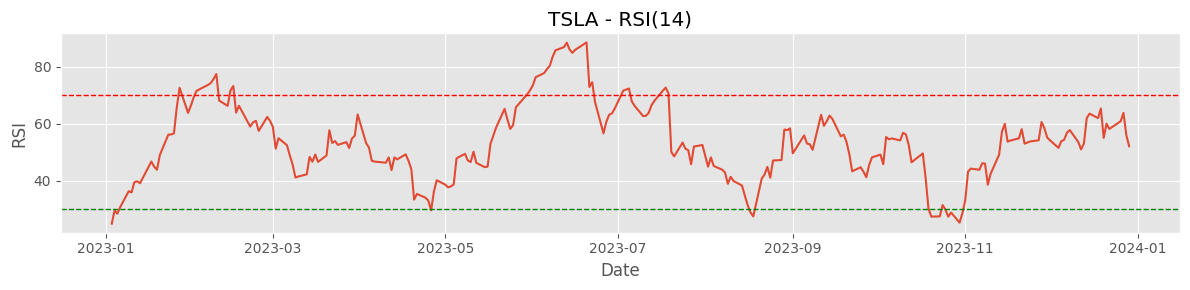

In [6]:
for t, df in all_data.items():
    print(f"=== {t} RSI(14) ===")
    plot_rsi(df, t, last_n=250)


=== AAPL MACD ===


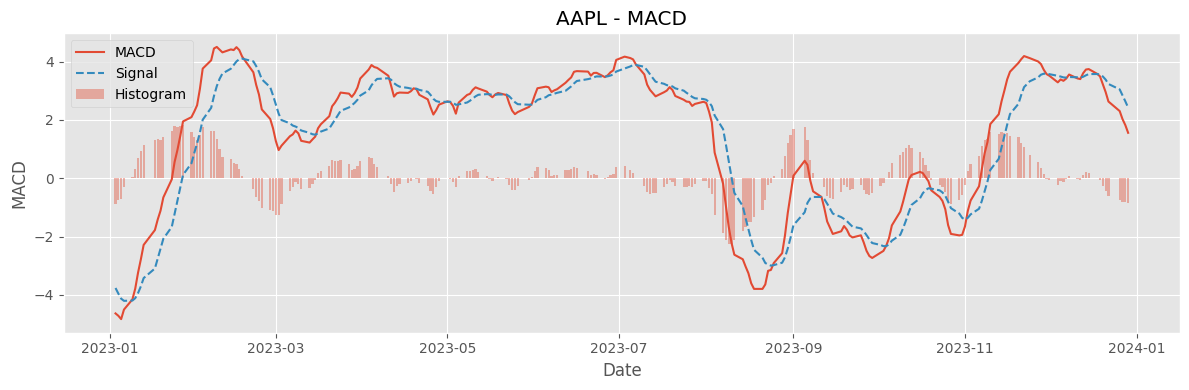

=== AMZN MACD ===


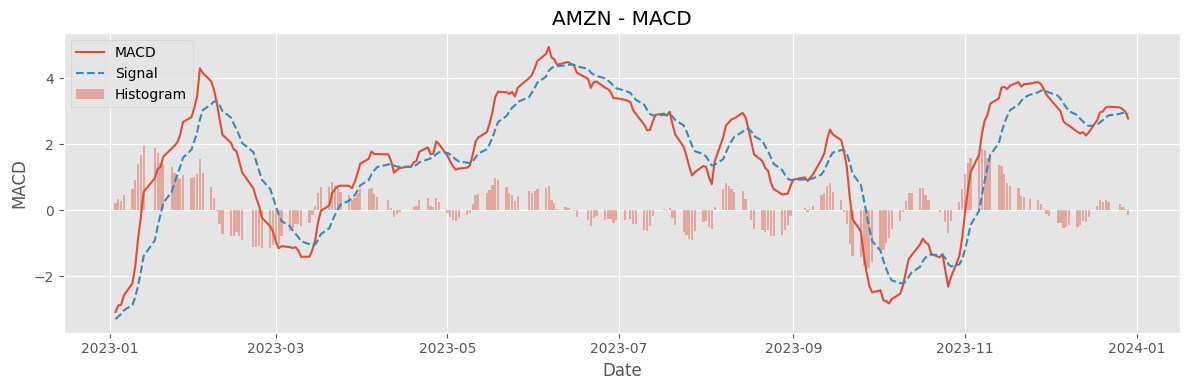

=== GOOG MACD ===


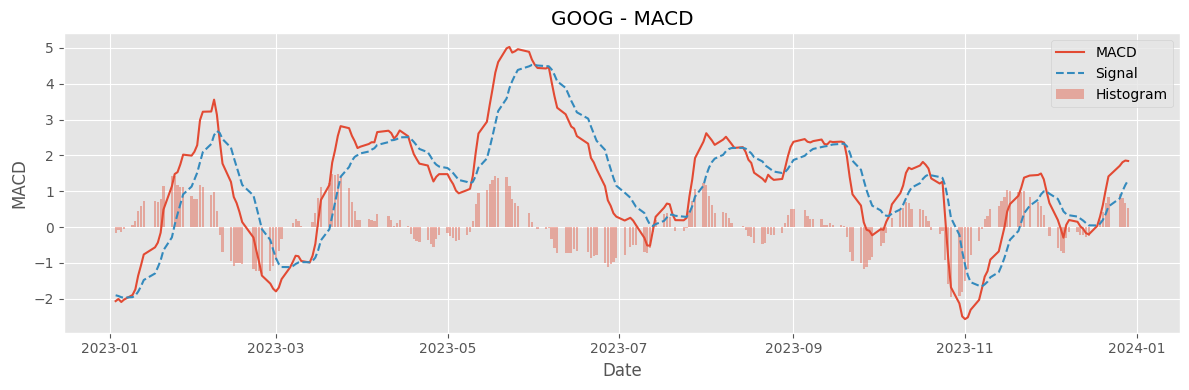

=== META MACD ===


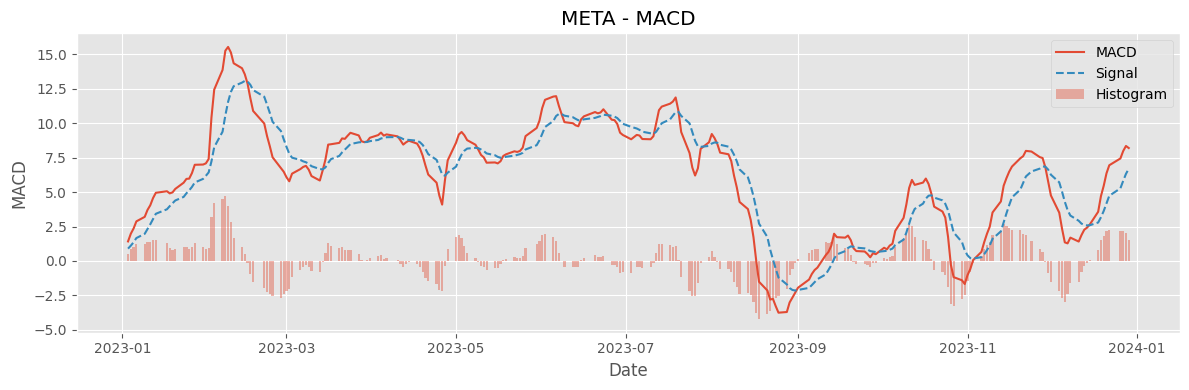

=== MSFT MACD ===


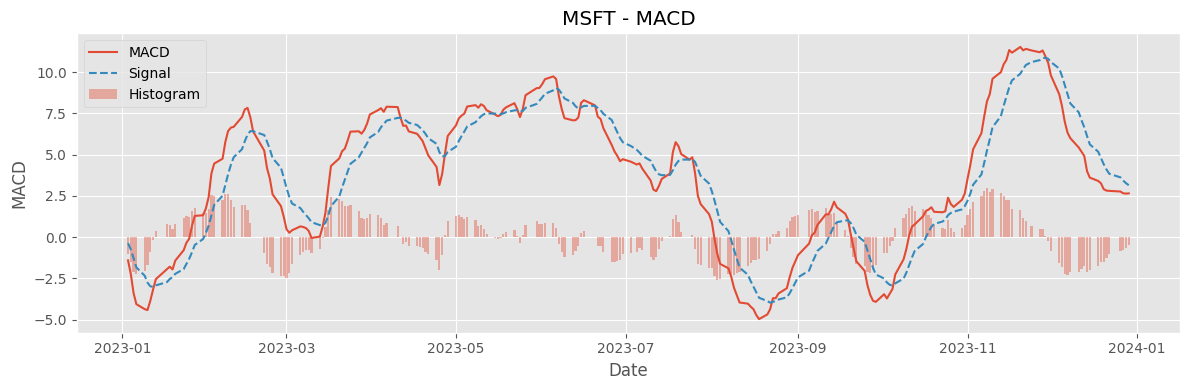

=== NVDA MACD ===


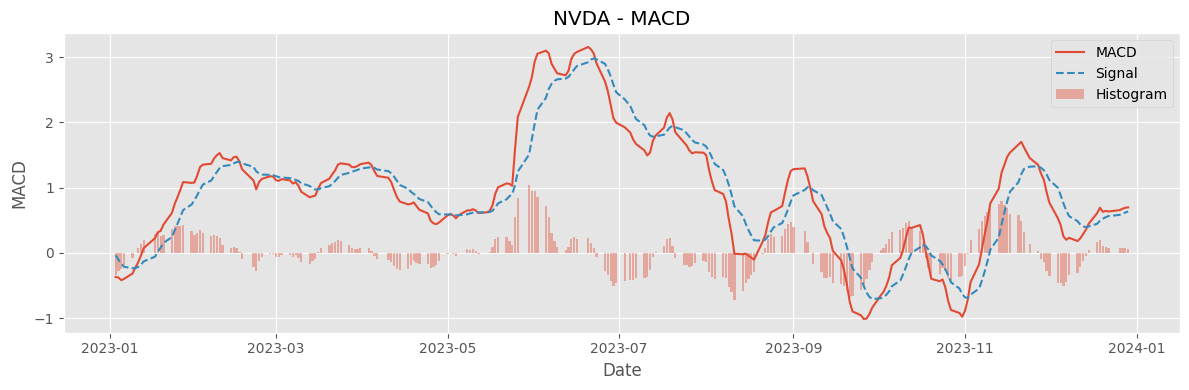

=== TSLA MACD ===


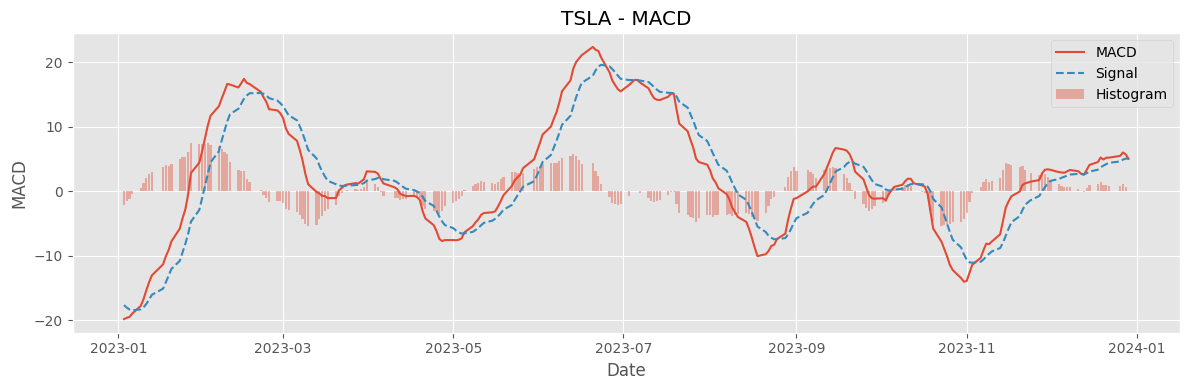

In [7]:
from scripts.finance_analysis import plot_macd

for t, df in all_data.items():
    print(f"=== {t} MACD ===")
    plot_macd(df, t, last_n=250)


In [8]:
# Ensure pynance.portfolio_optimizer is available and set 'po'.
try:
	from pynance import portfolio_optimizer as po  # overwrite previous 'po' if present
except Exception:
	# Try to install the package and import again
	%pip install pynance --quiet
	try:
		po = importlib.import_module("pynance.portfolio_optimizer")
	except Exception as e:
		raise ImportError(
			"pynance.portfolio_optimizer is not available. "
			"Install it with '%pip install pynance' or ensure it's on sys.path. "
			f"Original error: {e}"
		)

# Create the portfolio object
portfolio = po.PortfolioCalculations(TICKERS)
portfolio



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ImportError: pynance.portfolio_optimizer is not available. Install it with '%pip install pynance' or ensure it's on sys.path. Original error: No module named 'pynance.portfolio_optimizer'

In [9]:
from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio Weights ===")
print(portfolio.max_sharpe_portfolio("df").head())


c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  64.25%
Standard Deviation               36.75%

=== Max Sharpe Portfolio Weights ===
     Portfolio Weight
AAPL            0.00%
AMZN            0.00%
GOOG           43.14%
META            0.00%
MSFT            0.00%


In [10]:
# --- Min-Variance Portfolio ---

# Risk/return summary
min_var_rr = portfolio.min_var_portfolio("rr")
print("=== Min Variance Portfolio (risk/return) ===")
print(min_var_rr)

# Weights DataFrame
min_var_weights = portfolio.min_var_portfolio("df")
print("\n=== Min Variance Portfolio Weights ===")
display(min_var_weights)


=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.22%
Standard Deviation            19.99%

=== Min Variance Portfolio Weights ===


,Portfolio Weight
AAPL,35.88%
AMZN,0.00%
GOOG,14.08%
META,0.75%
MSFT,49.29%
NVDA,0.00%


In [ ]:
%pip install nbformat --quiet

# --- Efficient Frontier Plot ---

frontier_fig = portfolio.efficient_frontier()
frontier_fig.show()


c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\filimon.hailemariam\Downloads\Price Movement -Week1\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\pynance\

    Expected Return  Standard Deviation          AAPL      AMZN          GOOG  \
0            0.1189              0.3139  2.276070e-15  1.000000  1.213010e-18   
1            0.1203              0.3137  1.331383e-03  0.998669  0.000000e+00   
2            0.1216              0.3105  1.977711e-02  0.980223  2.775558e-17   
3            0.1229              0.3073  3.822284e-02  0.961777  0.000000e+00   
4            0.1243              0.3042  5.666857e-02  0.943331  0.000000e+00   
5            0.1256              0.3011  7.511430e-02  0.924886  0.000000e+00   
6            0.1270              0.2981  9.356003e-02  0.906440  5.551115e-17   
7            0.1283              0.2951  1.120058e-01  0.887994  0.000000e+00   
8            0.1296              0.2922  1.304515e-01  0.869549  0.000000e+00   
9            0.1310              0.2893  1.488972e-01  0.851103  0.000000e+00   
10           0.1323              0.2865  1.673430e-01  0.832657  0.000000e+00   
11           0.1337         

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed